<a href="https://colab.research.google.com/github/JeromeMberia/Hass_Consulting_Company/blob/main/IP_Week_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IP Week 7

## Define the Question

### Specifying the Question

> Make a prediction for the house price using their the house's features.


### Defining the Metric for Success

> Finding the best modal with an accurancy of above 80%

### Understanding the context 

>  Hass Consulting Company which is a real estate leader with over 25 years of experience. The consulting want to predict the house prices from the factors that influences the price range of the house.

### Recording the Experimental Design


1.   Load , read and explore the dataset. 
2.   Clean the dataset.
3.   Perform Exploratory Data Analysis.
4. Perform Regression Analysis
5. Detect for multicollinearity
6. Create a residual plots
7. Perform Heteroskedasticity
8. Perform Multiple Linear Regression 
9. Perform Quantile Regression
10. Perform Ridge Regression
11. Perform Lasso Regression
12. Perform Elastic Net Regression






### Data Relevance

> This dataset is really usefull it contains the houses sold with the king county which be useful for our prediction.

## Dataset

### Importing the Libraries

In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the Dataseet

In [194]:
df = pd.read_csv('house_data.csv')

### Checking the Dataset

In [195]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [196]:
df.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [197]:
df.nunique()

id               21436
price             3625
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

In [198]:
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [199]:
rows = df.shape[0]
columns = df.shape[1]
print(f'{columns} columns and {rows} rows')

20 columns and 21613 rows


In [200]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [202]:
df.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [203]:
col = list(df.columns)
for i in col:
  print(f'{i}')
  print('')
  print(df[i].unique())
  print('****************************************************************************')
  print('')

id

[7129300520 6414100192 5631500400 ... 1523300141  291310100 1523300157]
****************************************************************************

price

[221900. 538000. 180000. ... 541800. 610685. 402101.]
****************************************************************************

bedrooms

[ 3  2  4  5  1  6  7  0  8  9 11 10 33]
****************************************************************************

bathrooms

[1.   2.25 3.   2.   4.5  1.5  2.5  1.75 2.75 3.25 4.   3.5  0.75 4.75
 5.   4.25 3.75 0.   1.25 5.25 6.   0.5  5.5  6.75 5.75 8.   7.5  7.75
 6.25 6.5 ]
****************************************************************************

sqft_living

[1180 2570  770 ... 3087 3118 1425]
****************************************************************************

sqft_lot

[ 5650  7242 10000 ...  5813  2388  1076]
****************************************************************************

floors

[1.  2.  1.5 3.  2.5 3.5]
********************************************

## Data Wrangling */* Data Cleaning

### Duplicates

In [204]:
df.duplicated().sum()

3

In [205]:
df = df.drop_duplicates()

### Missing Value

In [206]:
df.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### Outliers

In [207]:
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

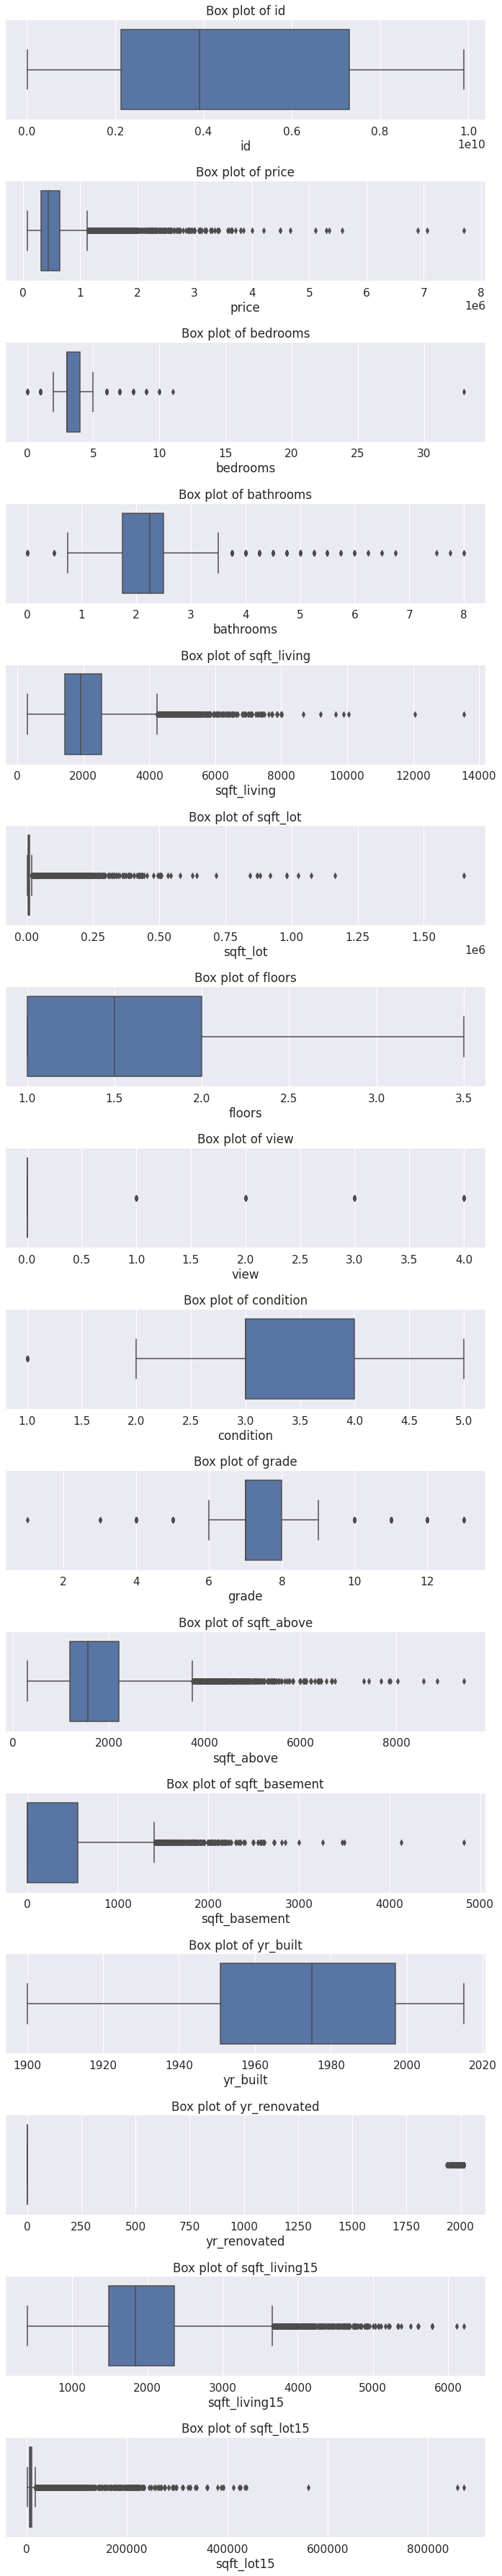

In [208]:
numeric = df.drop(['lat', 'long', 'zipcode', 'waterfront'],axis=1)

columns = None
columns = list(numeric.columns)
nrows = len(numeric.columns)
fig, ax = plt.subplots(nrows=nrows, ncols=1, figsize=(10,50))  

i = 0
for column in columns:

  sns.boxplot(x=df[column], ax=ax[i])
  ax[i].set_title(f'Box plot of {column}')
  ax[i].set_xlabel(column)
  i+=1

plt.tight_layout()
plt.show()

In [209]:
columns = list(numeric.columns)

for column in columns:

  max_threshold_df = df[column].quantile(0.95)
  min_threshold_df = df[column].quantile(0.05)
  df_1 = df[(df[column] < max_threshold_df) & (df[column]>min_threshold_df)]
  num = df.shape[0] - df_1.shape[0]
  print(f'{num} rows that are outliers in {column} \n This is {"{:.2f}".format((num/(df.shape[0]))*100)}% percent approximately of {column} column')
  print(' ')

2162 rows that are outliers in id 
 This is 10.00% percent approximately of id column
 
2175 rows that are outliers in price 
 This is 10.06% percent approximately of price column
 
4907 rows that are outliers in bedrooms 
 This is 22.71% percent approximately of bedrooms column
 
5226 rows that are outliers in bathrooms 
 This is 24.18% percent approximately of bathrooms column
 
2231 rows that are outliers in sqft_living 
 This is 10.32% percent approximately of sqft_living column
 
2163 rows that are outliers in sqft_lot 
 This is 10.01% percent approximately of sqft_lot column
 
19700 rows that are outliers in floors 
 This is 91.16% percent approximately of floors column
 
21278 rows that are outliers in view 
 This is 98.46% percent approximately of view column
 
15932 rows that are outliers in condition 
 This is 73.73% percent approximately of condition column
 
3949 rows that are outliers in grade 
 This is 18.27% percent approximately of grade column
 
2202 rows that are outl

In [210]:
#Dealing with outliers in year renovated
df.loc[df['yr_renovated'] > 0, 'yr_renovated'] = 1

In [211]:
df['yr_renovated'].unique()
# this is to make it true and false column 
# this because majority of the house haven't been renoveted

array([0, 1])

### Drop column id

In [212]:
df = df.drop(['id'],axis=1)

### Adding a new column 

In [213]:
pip install zipcodes

In [214]:
import zipcodes

In [215]:
for i, row in df.iterrows():
  zip_code = df.loc[i,'zipcode']
  zip_code=zip_code.astype(int)
  zip_code=zip_code.astype(str)
  df.loc[i,'city'] = zipcodes.matching(zip_code)[0]["city"] 
        
df.tail()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,city
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,Seattle
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,Seattle
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,Seattle
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,Issaquah
21612,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357,Seattle


In [216]:
df.to_csv('update.csv',)

## Exploratory Data Analysis (EDA)

### Univariate Analysis

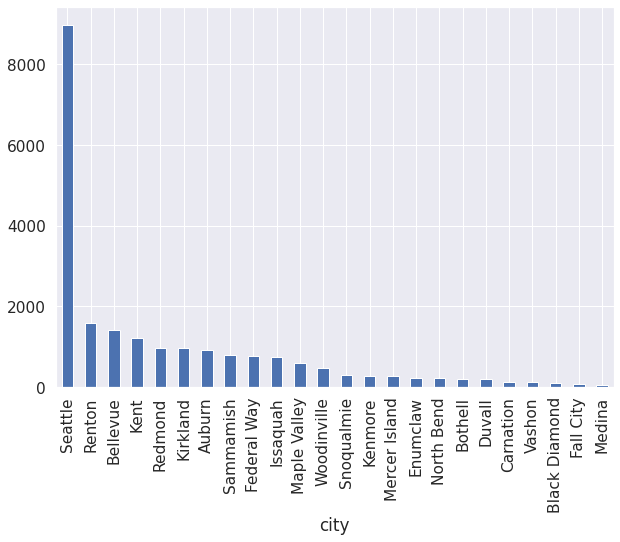

In [217]:
sns.set(font_scale=1.4)
df['city'].value_counts().plot(kind='bar', figsize=(10, 7))
plt.xlabel("city")
plt.show()

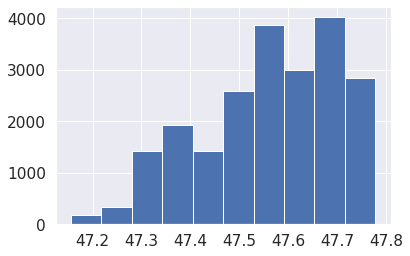

In [218]:
df['lat'].hist()

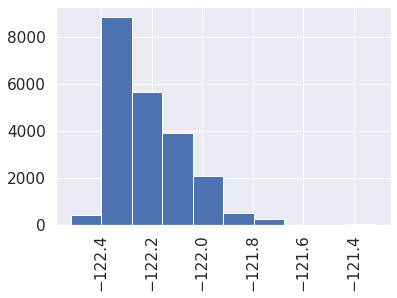

In [219]:
df['long'].hist(xrot=90, grid=True)


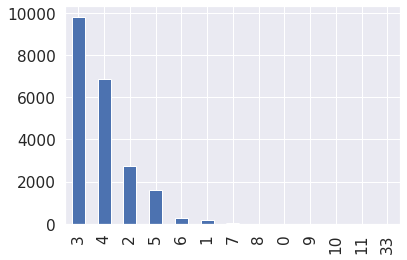

In [220]:
df.bedrooms.value_counts().plot(kind='bar')

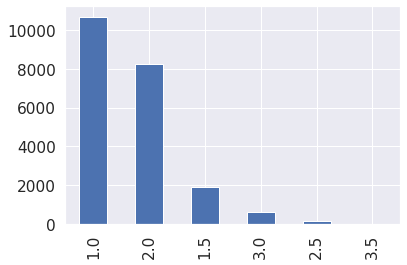

In [221]:
df.floors.value_counts().plot(kind='bar')

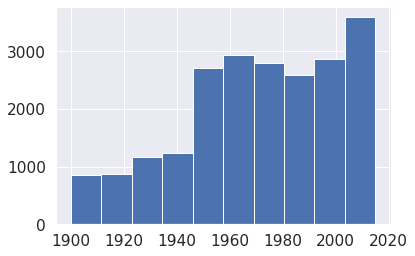

In [222]:
df.yr_built.hist()

#### Central Tendency

##### mean

In [223]:
numeric = df.drop(['lat', 'long','yr_renovated','zipcode', 'waterfront', 'city', 'yr_built'],axis=1)

columns = None
columns = list(numeric.columns)

for column in columns:
  mean = df[column].mean()
  print(f'This is the mean of the {column} column: ')
  print(f'{mean}')
  print('  ')

This is the mean of the price column: 
540178.9448403517
  
This is the mean of the bedrooms column: 
3.370846830171217
  
This is the mean of the bathrooms column: 
2.114738546968996
  
This is the mean of the sqft_living column: 
2079.881212401666
  
This is the mean of the sqft_lot column: 
15108.289819527996
  
This is the mean of the floors column: 
1.4942387783433595
  
This is the mean of the view column: 
0.23419713095788985
  
This is the mean of the condition column: 
3.4094400740397965
  
This is the mean of the grade column: 
7.656779268857011
  
This is the mean of the sqft_above column: 
1788.3478944932901
  
This is the mean of the sqft_basement column: 
291.53331790837575
  
This is the mean of the sqft_living15 column: 
1986.5186950485886
  
This is the mean of the sqft_lot15 column: 
12769.031975937067
  


##### median

In [224]:
numeric = df.drop(['lat', 'long','yr_renovated','zipcode', 'waterfront', 'city'],axis=1)
columns = list(numeric.columns)
for column in columns:
  median = df[column].median()
  print(f'This is the median of the {column} column: ')
  print(f'{median}')
  print('  ')

This is the median of the price column: 
450000.0
  
This is the median of the bedrooms column: 
3.0
  
This is the median of the bathrooms column: 
2.25
  
This is the median of the sqft_living column: 
1910.0
  
This is the median of the sqft_lot column: 
7619.0
  
This is the median of the floors column: 
1.5
  
This is the median of the view column: 
0.0
  
This is the median of the condition column: 
3.0
  
This is the median of the grade column: 
7.0
  
This is the median of the sqft_above column: 
1560.0
  
This is the median of the sqft_basement column: 
0.0
  
This is the median of the yr_built column: 
1975.0
  
This is the median of the sqft_living15 column: 
1840.0
  
This is the median of the sqft_lot15 column: 
7620.0
  


##### mode

In [225]:
numeric = df.drop(['lat', 'long','zipcode', 'city','yr_built', 'yr_renovated'],axis=1)
columns = list(numeric.columns)
for column in columns:
  mode = df[column].mode()[0]
  print(f'This is the mode of the {column} column: ')
  print(f'{mode}')
  print('  ')

This is the mode of the price column: 
350000.0
  
This is the mode of the bedrooms column: 
3
  
This is the mode of the bathrooms column: 
2.5
  
This is the mode of the sqft_living column: 
1300
  
This is the mode of the sqft_lot column: 
5000
  
This is the mode of the floors column: 
1.0
  
This is the mode of the waterfront column: 
0
  
This is the mode of the view column: 
0
  
This is the mode of the condition column: 
3
  
This is the mode of the grade column: 
7
  
This is the mode of the sqft_above column: 
1300
  
This is the mode of the sqft_basement column: 
0
  
This is the mode of the sqft_living15 column: 
1540
  
This is the mode of the sqft_lot15 column: 
5000
  


#### Dispersion

##### Standard Deviation

In [226]:
numeric = df.drop(['lat', 'long','zipcode', 'city', 'yr_built', 'yr_renovated'],axis=1)
columns = list(numeric.columns)
for column in columns:
  standard_deviation = df[column].std()
  print(f'This is the Standard Deviation of the {column} column: ')
  print(f'{standard_deviation}')
  print('  ')

This is the Standard Deviation of the price column: 
367387.58505388984
  
This is the Standard Deviation of the bedrooms column: 
0.9301096999846462
  
This is the Standard Deviation of the bathrooms column: 
0.770203702285374
  
This is the Standard Deviation of the sqft_living column: 
918.5002986169898
  
This is the Standard Deviation of the sqft_lot column: 
41423.2267370033
  
This is the Standard Deviation of the floors column: 
0.5399935009500416
  
This is the Standard Deviation of the waterfront column: 
0.08652315751754107
  
This is the Standard Deviation of the view column: 
0.7661364602166483
  
This is the Standard Deviation of the condition column: 
0.6507638952171331
  
This is the Standard Deviation of the grade column: 
1.1755002014627765
  
This is the Standard Deviation of the sqft_above column: 
828.1387234173122
  
This is the Standard Deviation of the sqft_basement column: 
442.5966986816738
  
This is the Standard Deviation of the sqft_living15 column: 
685.42

##### Variance

In [227]:
numeric = df.drop(['lat', 'long','zipcode', 'city','yr_built', 'yr_renovated'],axis=1)
columns = list(numeric.columns)
for column in columns:
  variance = df[column].var()
  print(f'This is the variance of the {column} column: ')
  print(f'{variance}')
  print('  ')

This is the variance of the price column: 
134973637651.72916
  
This is the variance of the bedrooms column: 
0.8651040540055286
  
This is the variance of the bathrooms column: 
0.593213743014097
  
This is the variance of the sqft_living column: 
843642.7985594993
  
This is the variance of the sqft_lot column: 
1715883713.305185
  
This is the variance of the floors column: 
0.2915929810682826
  
This is the variance of the waterfront column: 
0.007486256786805223
  
This is the variance of the view column: 
0.5869650756732958
  
This is the variance of the condition column: 
0.4234936473181757
  
This is the variance of the grade column: 
1.3818007236390282
  
This is the variance of the sqft_above column: 
685813.7452232556
  
This is the variance of the sqft_basement column: 
195891.83768391635
  
This is the variance of the sqft_living15 column: 
469808.5007611208
  
This is the variance of the sqft_lot15 column: 
745616132.1825517
  


##### Maximum

In [228]:
numeric = df.drop(['lat', 'long','zipcode', 'city','yr_built', 'yr_renovated'],axis=1)
columns = list(numeric.columns)
for column in columns:
  max = df[column].max()
  print(f'This is the largest value in the {column} column: ')
  print(f'{max}')
  print('  ')

This is the largest value in the price column: 
7700000.0
  
This is the largest value in the bedrooms column: 
33
  
This is the largest value in the bathrooms column: 
8.0
  
This is the largest value in the sqft_living column: 
13540
  
This is the largest value in the sqft_lot column: 
1651359
  
This is the largest value in the floors column: 
3.5
  
This is the largest value in the waterfront column: 
1
  
This is the largest value in the view column: 
4
  
This is the largest value in the condition column: 
5
  
This is the largest value in the grade column: 
13
  
This is the largest value in the sqft_above column: 
9410
  
This is the largest value in the sqft_basement column: 
4820
  
This is the largest value in the sqft_living15 column: 
6210
  
This is the largest value in the sqft_lot15 column: 
871200
  


##### Minimum

In [229]:
numeric = df.drop(['lat', 'long','zipcode', 'city','yr_built', 'yr_renovated', 'waterfront'],axis=1)
columns = list(numeric.columns)
for column in columns:
  min = df[column].min()
  print(f'This is the small value in the {column} column: ')
  print(f'{min}')
  print('  ')

This is the small value in the price column: 
75000.0
  
This is the small value in the bedrooms column: 
0
  
This is the small value in the bathrooms column: 
0.0
  
This is the small value in the sqft_living column: 
290
  
This is the small value in the sqft_lot column: 
520
  
This is the small value in the floors column: 
1.0
  
This is the small value in the view column: 
0
  
This is the small value in the condition column: 
1
  
This is the small value in the grade column: 
1
  
This is the small value in the sqft_above column: 
290
  
This is the small value in the sqft_basement column: 
0
  
This is the small value in the sqft_living15 column: 
399
  
This is the small value in the sqft_lot15 column: 
651
  


##### Range

In [230]:
numeric = df.drop(['lat', 'long','zipcode', 'city','yr_built', 'yr_renovated'],axis=1)
columns = list(numeric.columns)
for column in columns:
  max = df[column].max()
  min = df[column].min()
  range = max - min
  print(f'This is the range of the {column} column: ')
  print(f'{range}')
  print('  ')

This is the range of the price column: 
7625000.0
  
This is the range of the bedrooms column: 
33
  
This is the range of the bathrooms column: 
8.0
  
This is the range of the sqft_living column: 
13250
  
This is the range of the sqft_lot column: 
1650839
  
This is the range of the floors column: 
2.5
  
This is the range of the waterfront column: 
1
  
This is the range of the view column: 
4
  
This is the range of the condition column: 
4
  
This is the range of the grade column: 
12
  
This is the range of the sqft_above column: 
9120
  
This is the range of the sqft_basement column: 
4820
  
This is the range of the sqft_living15 column: 
5811
  
This is the range of the sqft_lot15 column: 
870549
  


##### Quantiles

###### First Quantile

In [231]:
numeric = df.drop(['lat', 'long','zipcode', 'city','yr_built', 'yr_renovated'],axis=1)
columns = list(numeric.columns)
for column in columns:
  first_quantile = df[column].quantile(0.25)
  print(f'This is the first quantile of the {column} column: ')
  print(f'{first_quantile}')
  print('  ')

This is the first quantile of the price column: 
321612.5
  
This is the first quantile of the bedrooms column: 
3.0
  
This is the first quantile of the bathrooms column: 
1.75
  
This is the first quantile of the sqft_living column: 
1425.5
  
This is the first quantile of the sqft_lot column: 
5040.0
  
This is the first quantile of the floors column: 
1.0
  
This is the first quantile of the waterfront column: 
0.0
  
This is the first quantile of the view column: 
0.0
  
This is the first quantile of the condition column: 
3.0
  
This is the first quantile of the grade column: 
7.0
  
This is the first quantile of the sqft_above column: 
1190.0
  
This is the first quantile of the sqft_basement column: 
0.0
  
This is the first quantile of the sqft_living15 column: 
1490.0
  
This is the first quantile of the sqft_lot15 column: 
5100.0
  


###### Second Quantile

In [232]:
numeric = df.drop(['lat', 'long','zipcode', 'city','yr_built', 'yr_renovated'],axis=1)
columns = list(numeric.columns)
for column in columns:
  second_quantile = df[column].quantile(0.5)
  print(f'This is the second quantile of the {column} column: ')
  print(f'{second_quantile}')
  print('  ')

This is the second quantile of the price column: 
450000.0
  
This is the second quantile of the bedrooms column: 
3.0
  
This is the second quantile of the bathrooms column: 
2.25
  
This is the second quantile of the sqft_living column: 
1910.0
  
This is the second quantile of the sqft_lot column: 
7619.0
  
This is the second quantile of the floors column: 
1.5
  
This is the second quantile of the waterfront column: 
0.0
  
This is the second quantile of the view column: 
0.0
  
This is the second quantile of the condition column: 
3.0
  
This is the second quantile of the grade column: 
7.0
  
This is the second quantile of the sqft_above column: 
1560.0
  
This is the second quantile of the sqft_basement column: 
0.0
  
This is the second quantile of the sqft_living15 column: 
1840.0
  
This is the second quantile of the sqft_lot15 column: 
7620.0
  


###### Third Quantile

In [233]:
numeric = df.drop(['lat', 'long','zipcode', 'city','yr_built', 'waterfront', 'yr_renovated'],axis=1)
columns = list(numeric.columns)
for column in columns:
  third_quantile = df[column].quantile(0.75)
  print(f'This is the third quantile of the {column} column: ')
  print(f'{third_quantile}')
  print('  ')

This is the third quantile of the price column: 
645000.0
  
This is the third quantile of the bedrooms column: 
4.0
  
This is the third quantile of the bathrooms column: 
2.5
  
This is the third quantile of the sqft_living column: 
2550.0
  
This is the third quantile of the sqft_lot column: 
10688.75
  
This is the third quantile of the floors column: 
2.0
  
This is the third quantile of the view column: 
0.0
  
This is the third quantile of the condition column: 
4.0
  
This is the third quantile of the grade column: 
8.0
  
This is the third quantile of the sqft_above column: 
2210.0
  
This is the third quantile of the sqft_basement column: 
560.0
  
This is the third quantile of the sqft_living15 column: 
2360.0
  
This is the third quantile of the sqft_lot15 column: 
10083.0
  


#### Descriptions of the distribution curve

##### Skewness

In [234]:
numeric = df.drop(['lat', 'long','zipcode', 'city','yr_built','waterfront', 'yr_renovated'],axis=1)
columns = list(numeric.columns)
for column in columns:
  skewness = df[column].skew()
  print(f'This is the skewness of the {column} column: ')
  print(f'{skewness}')
  print('  ')

This is the skewness of the price column: 
4.021467451317612
  
This is the skewness of the bedrooms column: 
1.9742435470953739
  
This is the skewness of the bathrooms column: 
0.5111642830477003
  
This is the skewness of the sqft_living column: 
1.4715321846904306
  
This is the skewness of the sqft_lot column: 
13.059170061304911
  
This is the skewness of the floors column: 
0.6165225291724865
  
This is the skewness of the view column: 
3.396871876044005
  
This is the skewness of the condition column: 
1.0327885174007136
  
This is the skewness of the grade column: 
0.7712970436226934
  
This is the skewness of the sqft_above column: 
1.4467579401958504
  
This is the skewness of the sqft_basement column: 
1.5778143003083518
  
This is the skewness of the sqft_living15 column: 
1.1082901797966638
  
This is the skewness of the sqft_lot15 column: 
9.506129480452218
  


##### Kurtosis

In [235]:
numeric = df.drop(['lat', 'long','zipcode', 'city','yr_built', 'yr_renovated'],axis=1)
columns = list(numeric.columns)
for column in columns:
  kurtosis = df[column].kurt()
  print(f'This is the kurtosis of the {column} column: ')
  print(f'{kurtosis}')
  print('  ')

This is the kurtosis of the price column: 
34.517437729615054
  
This is the kurtosis of the bedrooms column: 
49.06010825423431
  
This is the kurtosis of the bathrooms column: 
1.2796371646131974
  
This is the kurtosis of the sqft_living column: 
5.242222911342459
  
This is the kurtosis of the sqft_lot column: 
285.0406214916321
  
This is the kurtosis of the floors column: 
-0.4842457226464969
  
This is the kurtosis of the waterfront column: 
127.6140895994763
  
This is the kurtosis of the view column: 
10.9021183028132
  
This is the kurtosis of the condition column: 
0.5256882874168287
  
This is the kurtosis of the grade column: 
1.1910898336094307
  
This is the kurtosis of the sqft_above column: 
3.4020083332111235
  
This is the kurtosis of the sqft_basement column: 
2.714885503607166
  
This is the kurtosis of the sqft_living15 column: 
1.5970089685116453
  
This is the kurtosis of the sqft_lot15 column: 
150.74327525589925
  


### Bivariate Analysis

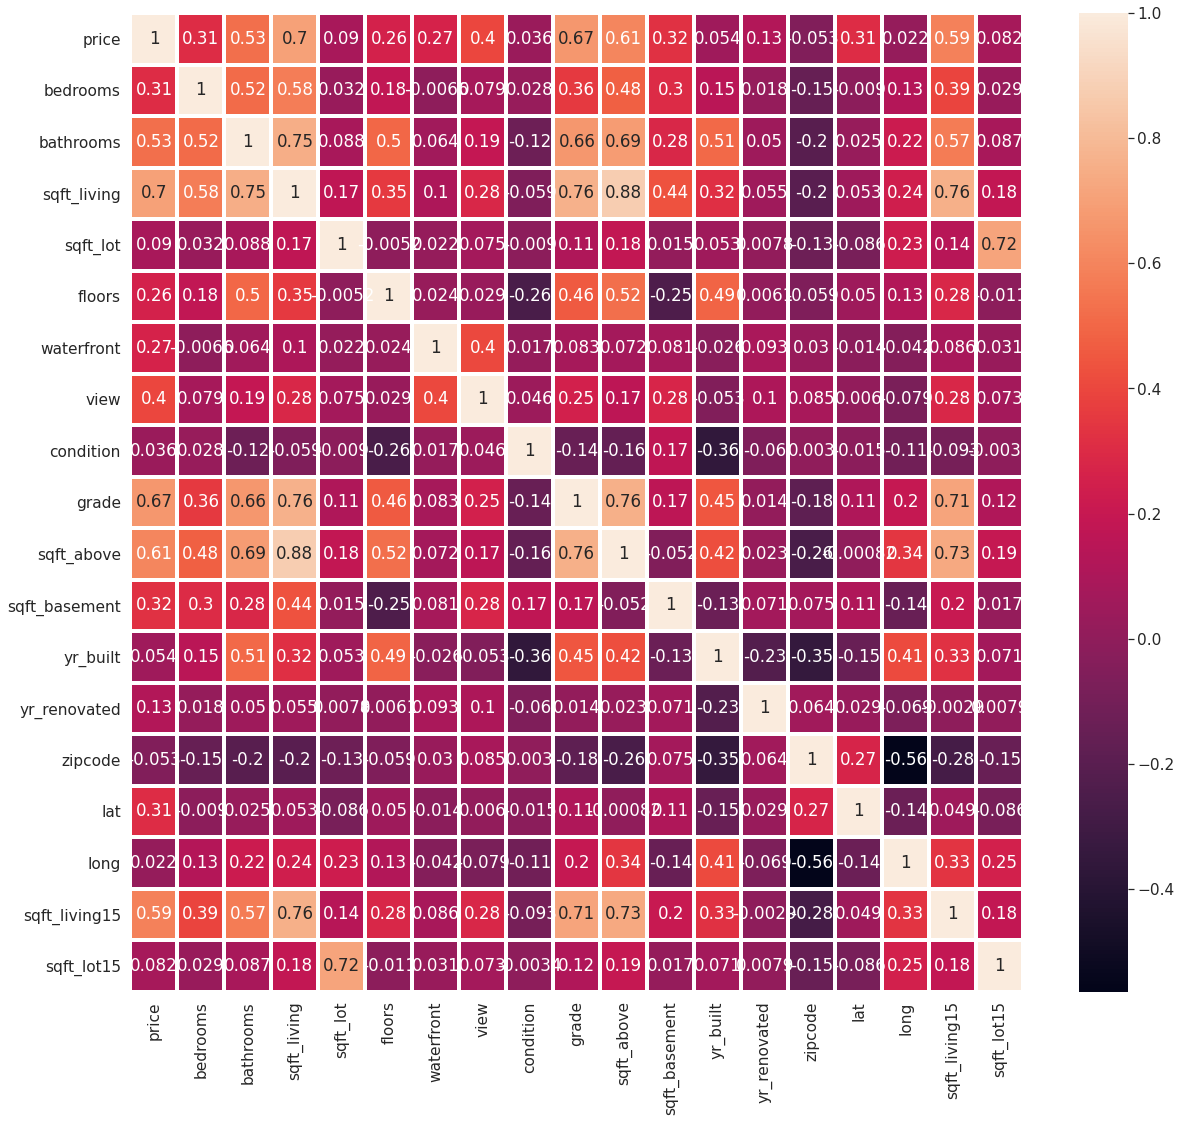

In [236]:
plt.subplots(figsize=(20,18))
sns.heatmap(df.corr(),annot=True, linewidths=3, linecolor='white')
sns.set(font_scale=4)
plt.show()

### Multivariate Analysis

#### Reression Analysis

##### Detecting multicollinearity

In [237]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['city'] = le.fit_transform(df['city'])
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,city
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,20
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1,98125,47.7210,-122.319,1690,7639,20
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,10
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,20
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,19


In [238]:
independent_only = df.drop(['price'], axis=1)

In [239]:
correlations = independent_only.corr()
correlations

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,city
bedrooms,1.000000,0.515935,0.576674,0.031699,0.175448,-0.006583,0.079433,0.028422,0.357003,0.477619,0.303077,0.154276,0.018406,-0.152721,-0.008953,0.129474,0.391633,0.029233,-0.126882
bathrooms,0.515935,1.000000,0.754688,0.087750,0.500669,0.063747,0.187891,-0.124940,0.664990,0.685351,0.283814,0.505997,0.050401,-0.203831,0.024590,0.223047,0.568665,0.087191,-0.118600
sqft_living,0.576674,0.754688,1.000000,0.172830,0.353954,0.103820,0.284641,-0.058768,0.762719,0.876600,0.435054,0.318099,0.055045,-0.199435,0.052521,0.240221,0.756420,0.183285,-0.129034
sqft_lot,0.031699,0.087750,0.172830,1.000000,-0.005171,0.021601,0.074753,-0.008967,0.113644,0.183527,0.015271,0.053105,0.007780,-0.129611,-0.085680,0.229552,0.144620,0.718556,-0.101243
floors,0.175448,0.500669,0.353954,-0.005171,1.000000,0.023711,0.029325,-0.263779,0.458151,0.523874,-0.245673,0.489347,0.006075,-0.059025,0.049593,0.125343,0.279861,-0.011250,0.035938
waterfront,-0.006583,0.063747,0.103820,0.021601,0.023711,1.000000,0.401993,0.016652,0.082785,0.072080,0.080585,-0.026159,0.093360,0.030277,-0.014272,-0.041904,0.086469,0.030702,0.027929
view,0.079433,0.187891,0.284641,0.074753,0.029325,0.401993,1.000000,0.045836,0.251378,0.167659,0.276996,-0.053229,0.103347,0.084838,0.006049,-0.078560,0.280404,0.072577,0.027504
condition,0.028422,-0.124940,-0.058768,-0.008967,-0.263779,0.016652,0.045836,1.000000,-0.144655,-0.158212,0.174071,-0.361347,-0.060386,0.002962,-0.014971,-0.106512,-0.092854,-0.003424,-0.034226
grade,0.357003,0.664990,0.762719,0.113644,0.458151,0.082785,0.251378,-0.144655,1.000000,0.755919,0.168443,0.446966,0.013965,-0.184795,0.114086,0.198347,0.713208,0.119265,-0.103553
sqft_above,0.477619,0.685351,0.876600,0.183527,0.523874,0.072080,0.167659,-0.158212,0.755919,1.000000,-0.051923,0.423922,0.023126,-0.261163,-0.000823,0.343791,0.731870,0.194060,-0.152795


In [240]:
pd.DataFrame(np.linalg.inv(correlations.to_numpy()), 
             index = correlations.index, 
             columns = correlations.columns)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,city
bedrooms,1.654400,-0.463218,-6.315196e-01,0.048021,0.044653,0.061002,0.116917,-0.049973,0.308939,-3.030003e-01,-1.786394e-01,0.136583,0.046792,0.021527,0.036606,0.007591,0.025004,0.088351,0.076422
bathrooms,-0.463218,3.352384,-3.068845e+00,-0.022944,-0.671253,0.011800,-0.044376,-0.137540,-0.269733,1.495829e+00,3.992427e-01,-0.937037,-0.260457,0.088662,-0.029658,0.061654,0.092395,0.069070,-0.061074
sqft_living,-0.632622,-3.069177,1.814600e+13,-0.086687,2.761432,-0.051460,-0.005694,-0.235039,-1.926871,-1.636081e+13,-8.743992e+12,0.308786,-0.172109,-0.219123,-0.034019,0.265235,-1.096231,-0.051331,-0.186728
sqft_lot,0.048021,-0.022944,-8.749806e-02,2.103283,0.048212,0.028568,-0.060567,0.030099,-0.054994,-1.203988e-01,-9.600691e-04,0.097488,0.020646,0.031722,0.061656,-0.127373,0.164073,-1.461020,-0.044696
floors,0.044653,-0.671253,2.763861e+00,0.048212,2.024024,-0.000718,-0.045848,0.088298,-0.235452,-2.995904e+00,-7.188173e-01,-0.486104,-0.082211,-0.034647,-0.094475,0.187410,0.273280,0.065843,-0.177436
waterfront,0.061002,0.011800,-5.181368e-02,0.028568,-0.000718,1.205906,-0.495130,-0.013470,0.047435,-6.531369e-02,2.041207e-02,-0.023149,-0.067065,0.076493,0.022895,0.036418,0.054637,-0.021175,-0.070293
view,0.116917,-0.044376,-4.802182e-03,-0.060567,-0.045848,-0.495130,1.438130,-0.020393,-0.183076,4.369219e-02,-2.530601e-01,0.153872,-0.038310,-0.206418,0.102669,0.060771,-0.325695,-0.004177,0.085694
condition,-0.049973,-0.137540,-2.353840e-01,0.030099,0.088298,-0.013470,-0.020393,1.249478,-0.053740,2.676192e-01,1.622415e-02,0.561812,0.206554,0.144019,0.059498,-0.009766,0.075697,-0.027355,0.022487
grade,0.308939,-0.269733,-1.929780e+00,-0.054994,-0.235452,0.047435,-0.183076,-0.053740,3.418629,1.305149e-01,4.443640e-01,-0.636743,-0.069898,0.031173,-0.343442,0.384844,-0.911746,0.074445,0.067754
sqft_above,-0.304773,1.494247,-1.636081e+13,-0.121193,-2.994190,-0.065605,0.044528,0.267337,0.127696,1.475124e+13,7.883763e+12,0.241265,0.153524,0.121129,0.211483,-0.580986,-0.547326,-0.129384,0.169373


In [241]:
independent_only = independent_only.drop(columns=['sqft_basement'])
revised = independent_only

correlations = revised.corr()
pd.DataFrame(np.linalg.inv(correlations.values), 
             index = correlations.index, 
             columns = correlations.columns)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,city
bedrooms,1.654400,-0.463218,-1.003200,0.048021,0.044653,0.061002,0.116917,-0.049973,0.308939,0.029348,0.136583,0.046792,0.021527,0.036606,0.007591,0.025004,0.088351,0.076422
bathrooms,-0.463218,3.352384,-2.241749,-0.022944,-0.671253,0.011800,-0.044376,-0.137540,-0.269733,0.748222,-0.937037,-0.260457,0.088662,-0.029658,0.061654,0.092395,0.069070,-0.061074
sqft_living,-1.003200,-2.241749,8.658493,-0.089516,1.272089,-0.009440,-0.529911,-0.201681,-1.007575,-5.031827,0.510933,-0.027994,-0.220747,-0.181103,0.297754,-0.977858,-0.121019,0.067862
sqft_lot,0.048021,-0.022944,-0.089516,2.103283,0.048212,0.028568,-0.060567,0.030099,-0.054994,-0.118643,0.097488,0.020646,0.031722,0.061656,-0.127373,0.164073,-1.461020,-0.044696
floors,0.044653,-0.671253,1.272089,0.048212,2.024024,-0.000718,-0.045848,0.088298,-0.235452,-1.651367,-0.486104,-0.082211,-0.034647,-0.094475,0.187410,0.273280,0.065843,-0.177436
waterfront,0.061002,0.011800,-0.009440,0.028568,-0.000718,1.205906,-0.495130,-0.013470,0.047435,-0.103490,-0.023149,-0.067065,0.076493,0.022895,0.036418,0.054637,-0.021175,-0.070293
view,0.116917,-0.044376,-0.529911,-0.060567,-0.045848,-0.495130,1.438130,-0.020393,-0.183076,0.517173,0.153872,-0.038310,-0.206418,0.102669,0.060771,-0.325695,-0.004177,0.085694
condition,-0.049973,-0.137540,-0.201681,0.030099,0.088298,-0.013470,-0.020393,1.249478,-0.053740,0.237261,0.561812,0.206554,0.144019,0.059498,-0.009766,0.075697,-0.027355,0.022487
grade,0.308939,-0.269733,-1.007575,-0.054994,-0.235452,0.047435,-0.183076,-0.053740,3.418629,-0.701161,-0.636743,-0.069898,0.031173,-0.343442,0.384844,-0.911746,0.074445,0.067754
sqft_above,0.029348,0.748222,-5.031827,-0.118643,-1.651367,-0.103490,0.517173,0.237261,-0.701161,6.958244,0.059005,0.023588,0.122594,0.344097,-0.610306,-0.654053,-0.066552,-0.060170


In [242]:
independent_only = independent_only.drop(columns=['sqft_living'])
revised = independent_only

correlations = revised.corr()
pd.DataFrame(np.linalg.inv(correlations.values), 
             index = correlations.index, 
             columns=correlations.columns)

,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,city
bedrooms,1.538166,-0.722954,0.037649,0.192041,0.059908,0.055520,-0.073340,0.192199,-0.553655,0.195781,0.043548,-0.004049,0.015623,0.042090,-0.088294,0.074329,0.084285
bathrooms,-0.722954,2.771978,-0.046120,-0.341900,0.009356,-0.181574,-0.189757,-0.530602,-0.554556,-0.804752,-0.267705,0.031509,-0.076547,0.138744,-0.160780,0.037737,-0.043504
sqft_lot,0.037649,-0.046120,2.102357,0.061364,0.028471,-0.066046,0.028014,-0.065411,-0.170664,0.102771,0.020356,0.029440,0.059784,-0.124295,0.153963,-1.462271,-0.043995
floors,0.192041,-0.341900,0.061364,1.837131,0.000669,0.032006,0.117929,-0.087421,-0.912101,-0.561169,-0.078098,-0.002215,-0.067868,0.143665,0.416945,0.083623,-0.187406
waterfront,0.059908,0.009356,0.028471,0.000669,1.205896,-0.495708,-0.013690,0.046337,-0.108976,-0.022592,-0.067096,0.076252,0.022698,0.036743,0.053571,-0.021307,-0.070219
view,0.055520,-0.181574,-0.066046,0.032006,-0.495708,1.405699,-0.032736,-0.244741,0.209219,0.185142,-0.040024,-0.219928,0.091585,0.078994,-0.385541,-0.011584,0.089847
condition,-0.073340,-0.189757,0.028014,0.117929,-0.013690,-0.032736,1.244781,-0.077209,0.120055,0.573713,0.205901,0.138877,0.055280,-0.002830,0.052920,-0.030173,0.024068
grade,0.192199,-0.530602,-0.065411,-0.087421,0.046337,-0.244741,-0.077209,3.301379,-1.286706,-0.577287,-0.073156,0.005485,-0.364517,0.419493,-1.025538,0.060362,0.075651
sqft_above,-0.553655,-0.554556,-0.170664,-0.912101,-0.108976,0.209219,0.120055,-1.286706,4.034031,0.355930,0.007319,-0.005692,0.238850,-0.437268,-1.222329,-0.136881,-0.020733
yr_built,0.195781,-0.804752,0.102771,-0.561169,-0.022592,0.185142,0.573713,-0.577287,0.355930,2.401819,0.536051,0.217191,0.308281,-0.531975,0.134942,-0.023934,0.064633


In [243]:
independent_only = independent_only.drop(columns=['sqft_above'])
revised = independent_only

correlations = revised.corr()
pd.DataFrame(np.linalg.inv(correlations.values), 
             index = correlations.index, 
             columns = correlations.columns)

,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,city
bedrooms,1.462179,-0.799065,0.014226,0.066859,0.044951,0.084235,-0.056863,0.015603,0.244631,0.044553,-0.004830,0.048404,-0.017924,-0.256054,0.055542,0.081440
bathrooms,-0.799065,2.695743,-0.069581,-0.467286,-0.005625,-0.152813,-0.173253,-0.707485,-0.755823,-0.266699,0.030726,-0.043712,0.078633,-0.328813,0.018920,-0.046354
sqft_lot,0.014226,-0.069581,2.095137,0.022776,0.023860,-0.057194,0.033093,-0.119847,0.117829,0.020666,0.029199,0.069889,-0.142794,0.102251,-1.468062,-0.044872
floors,0.066859,-0.467286,0.022776,1.630904,-0.023971,0.079311,0.145073,-0.378348,-0.480692,-0.076444,-0.003502,-0.013863,0.044798,0.140574,0.052674,-0.192094
waterfront,0.044951,-0.005625,0.023860,-0.023971,1.202952,-0.490056,-0.010447,0.011577,-0.012977,-0.066898,0.076099,0.029150,0.024930,0.020551,-0.025005,-0.070779
view,0.084235,-0.152813,-0.057194,0.079311,-0.490056,1.394848,-0.038963,-0.178008,0.166682,-0.040403,-0.219633,0.079197,0.101673,-0.322146,-0.004485,0.090922
condition,-0.056863,-0.173253,0.033093,0.145073,-0.010447,-0.038963,1.241208,-0.038916,0.563121,0.205684,0.139046,0.048172,0.010183,0.089297,-0.026100,0.024685
grade,0.015603,-0.707485,-0.119847,-0.378348,0.011577,-0.178008,-0.038916,2.890967,-0.463758,-0.070821,0.003670,-0.288332,0.280021,-1.415416,0.016702,0.069038
yr_built,0.244631,-0.755823,0.117829,-0.480692,-0.012977,0.166682,0.563121,-0.463758,2.370414,0.535405,0.217693,0.287207,-0.493394,0.242791,-0.011857,0.066462
yr_renovated,0.044553,-0.266699,0.020666,-0.076444,-0.066898,-0.040403,0.205684,-0.070821,0.535405,1.150623,0.014291,0.039721,-0.055995,0.097778,-0.021170,0.028804


##### Heteroskedasticity testing

In [244]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x = revised.to_numpy()
y = df['price'].to_numpy()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

regressor = LinearRegression()
regressor.fit(x_train, y_train)

# This is our prediction for admission based on our model
y_pred = regressor.predict(x_test)

# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(y_pred, y_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

residuals.mean()

900.1901681288394

In [245]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(f'Critical value : {critical_value}')
print(f'Probability : {probability}')
print(f'Degree of freedom : {probability}')
print(f'P Value : {p_value}')
print(f'Test Statistics : {test_result}')

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('The variances are unequal, and the model should be reassessed')
else:
  print('The variances are homogeneous!')

Critical value : inf
Probability : 1.0
Degree of freedom : 1.0
P Value : 4.022553020361908e-171
Test Statistics : 777.5899224115026
The variances are homogeneous!


##### Residual plots 

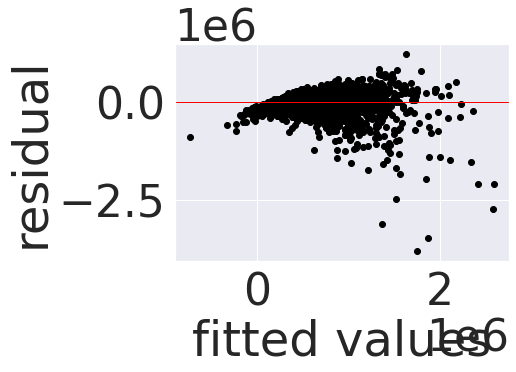

In [246]:
import matplotlib.pyplot as plt


plt.scatter(y_pred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

##### Multiple Linear Regression

In [247]:
x = revised.to_numpy()
y = df['price'].to_numpy()

In [248]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [249]:
df.price.mean()*0.1

54017.894484035176

In [250]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(x_train, y_train)

y_pred = regressor.predict(x_test)

from sklearn import metrics

In [251]:
from sklearn.model_selection import KFold


folds = KFold(n_splits=10)

# note that if you have a KFold object, you can figure out how many folds you set up 
# for it using get_n_splits
print('we are using ' +str(folds.get_n_splits(x)) + ' folds')

# We now create and assess 5 models based on the folds we created.
RMSES = [] # We will use this array to keep track of the RSME of each model
count = 1 # This will just help 
for train_index, test_index in folds.split(x):
  print('\nTraining model ' + str(count))
  
  # set up the train and test based on the split determined by KFold
  # With 5 folds, we will end up with 80% of our data in the training set, and 20% in the test set, just as above
  x_train, x_test = x[train_index], x[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  # fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(x_train, y_train)
  
  # assess the accuraccy of the model
  y_pred = regressor.predict(x_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1

we are using 10 folds

Training model 1
Model 1 Root Mean Squared Error: 220848.49653730477

Training model 2
Model 2 Root Mean Squared Error: 236100.12509195282

Training model 3
Model 3 Root Mean Squared Error: 202040.1554851399

Training model 4
Model 4 Root Mean Squared Error: 243158.12117008786

Training model 5
Model 5 Root Mean Squared Error: 197834.06198848676

Training model 6
Model 6 Root Mean Squared Error: 198234.83027554062

Training model 7
Model 7 Root Mean Squared Error: 194985.0002092695

Training model 8
Model 8 Root Mean Squared Error: 199985.48606752738

Training model 9
Model 9 Root Mean Squared Error: 213323.94825892514

Training model 10
Model 10 Root Mean Squared Error: 227015.51292252814


In [252]:
np.mean(RMSES)

213352.57380067633

###### test

In [253]:
print(f'Mean of price : {df.price.mean()}')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean of price : 540178.9448403517
Mean Absolute Error: 134723.64711023253
Mean Squared Error: 51536043107.478546
Root Mean Squared Error: 227015.51292252814


In [254]:
a = df.price.mean()*0.1
b = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [255]:
if a >= b:
  print('Good modal')
else:
  print('Bad modal')

Bad modal


##### Quantile Regression

In [286]:
x = revised
y = df['price']

In [287]:
x.shape


(21610, 16)

In [288]:
y.shape

(21610,)

In [289]:
# sm.OLS(y, x).fit().summary()

In [290]:
# resrlm = sm.RLM(y, x).fit()
# print(resrlm.params)
# print(resrlm.summary())

In [291]:
# import statsmodels.api as sm

# mod = sm.OLS(y, x)    # Describe model

# res = mod.fit()       # Fit model

# print(res.summary())

In [292]:
import statsmodels.formula.api as smf

for i in np.arange(0.1,1,0.1):
  mod = smf.quantreg('y ~ x', df)
  res = mod.fit(i)

  print(res.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.3679
Model:                       QuantReg   Bandwidth:                   1.772e+04
Method:                 Least Squares   Sparsity:                    4.347e+05
Date:                Mon, 23 Nov 2020   No. Observations:                21610
Time:                        22:39:36   Df Residuals:                    21593
                                        Df Model:                           16
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    259.0259      4.857     53.331      0.000     249.506     268.546
x[0]        6232.4092   1158.510      5.380      0.000    3961.644    8503.175
x[1]        3.748e+04   1943.816     19.282      0.000    3.37e+04    4.13e+04
x[2]           0.1347      0.040      3.389      0.0

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.3971
Model:                       QuantReg   Bandwidth:                   1.736e+04
Method:                 Least Squares   Sparsity:                    3.129e+05
Date:                Mon, 23 Nov 2020   No. Observations:                21610
Time:                        22:39:41   Df Residuals:                    21593
                                        Df Model:                           16
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -246.3644      4.331    -56.883      0.000    -254.854    -237.875
x[0]        5217.8542   1085.258      4.808      0.000    3090.669    7345.040
x[1]        4.839e+04   1806.697     26.783      0.000    4.48e+04    5.19e+04
x[2]           0.2550      0.031      8.106      0.0

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.4186
Model:                       QuantReg   Bandwidth:                   1.825e+04
Method:                 Least Squares   Sparsity:                    2.868e+05
Date:                Mon, 23 Nov 2020   No. Observations:                21610
Time:                        22:39:47   Df Residuals:                    21593
                                        Df Model:                           16
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    253.4650      4.263     59.451      0.000     245.108     261.822
x[0]         -76.0246   1132.732     -0.067      0.946   -2296.262    2144.213
x[1]        5.363e+04   1894.881     28.302      0.000    4.99e+04    5.73e+04
x[2]           0.2423      0.034      7.073      0.0

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.4389
Model:                       QuantReg   Bandwidth:                   1.937e+04
Method:                 Least Squares   Sparsity:                    2.707e+05
Date:                Mon, 23 Nov 2020   No. Observations:                21610
Time:                        22:39:52   Df Residuals:                    21593
                                        Df Model:                           16
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     87.9998      4.146     21.224      0.000      79.873      96.127
x[0]         -31.7206   1157.158     -0.027      0.978   -2299.836    2236.395
x[1]        5.786e+04   1910.754     30.280      0.000    5.41e+04    6.16e+04
x[2]           0.3108      0.033      9.373      0.0

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.4510
Model:                       QuantReg   Bandwidth:                   2.036e+04
Method:                 Least Squares   Sparsity:                    2.688e+05
Date:                Mon, 23 Nov 2020   No. Observations:                21610
Time:                        22:39:57   Df Residuals:                    21593
                                        Df Model:                           16
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    216.5244      4.044     53.543      0.000     208.598     224.451
x[0]       -2472.4607   1188.658     -2.080      0.038   -4802.319    -142.603
x[1]        5.588e+04   1948.929     28.672      0.000    5.21e+04    5.97e+04
x[2]           0.2973      0.032      9.316      0.0

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.4689
Model:                       QuantReg   Bandwidth:                   1.994e+04
Method:                 Least Squares   Sparsity:                    2.998e+05
Date:                Mon, 23 Nov 2020   No. Observations:                21610
Time:                        22:40:03   Df Residuals:                    21593
                                        Df Model:                           16
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    696.8674      4.265    163.377      0.000     688.507     705.228
x[0]        -164.7625   1328.434     -0.124      0.901   -2768.592    2439.067
x[1]        6.675e+04   2161.702     30.879      0.000    6.25e+04     7.1e+04
x[2]           0.3370      0.033     10.076      0.0

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.4819
Model:                       QuantReg   Bandwidth:                   1.940e+04
Method:                 Least Squares   Sparsity:                    3.553e+05
Date:                Mon, 23 Nov 2020   No. Observations:                21610
Time:                        22:40:08   Df Residuals:                    21593
                                        Df Model:                           16
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    812.4770      4.673    173.883      0.000     803.319     821.636
x[0]        1751.8662   1524.033      1.149      0.250   -1235.352    4739.084
x[1]        7.263e+04   2452.863     29.611      0.000    6.78e+04    7.74e+04
x[2]           0.3664      0.036     10.222      0.0

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.4942
Model:                       QuantReg   Bandwidth:                   1.950e+04
Method:                 Least Squares   Sparsity:                    4.957e+05
Date:                Mon, 23 Nov 2020   No. Observations:                21610
Time:                        22:40:14   Df Residuals:                    21593
                                        Df Model:                           16
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    725.7728      5.849    124.083      0.000     714.308     737.237
x[0]         975.6577   1754.586      0.556      0.578   -2463.461    4414.776
x[1]        7.926e+04   3063.061     25.877      0.000    7.33e+04    8.53e+04
x[2]           0.4628      0.040     11.492      0.0

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


##### Ridge Regression

In [263]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [264]:
x = df.drop(['price'], axis=1)
y = df['price']

In [265]:
#Standardizing features the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = scaler.fit_transform(x)

In [266]:
ridge = Ridge(normalize = True)
search = GridSearchCV(estimator = ridge,
                      param_grid = {'alpha':np.logspace(-5,2,8)},
                      scoring = 'neg_mean_squared_error',
                      n_jobs = 1,
                      refit = True,
                      cv = 10)

In [267]:
search.fit(x,y)
par = search.best_params_
par

{'alpha': 0.01}

In [268]:
alpha = par['alpha']
alpha

0.01

In [269]:
abs(search.best_score_) 

40934464796.96801

In [270]:
ridge = Ridge(normalize = True, 
              alpha = alpha)
ridge.fit(x,y)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=0.001)

In [271]:
print(f'Ridge score : {ridge.score(x, y)}')

Ridge score : 0.7004022206905538


##### Lasso Regression

In [272]:
x = df.drop(['price'], axis=1)
y = df['price']

In [273]:
#Standardizing features the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = scaler.fit_transform(x)

In [274]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import warnings

#Building the lasso model then choosing he riht regularization parameters using grid search  

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), 
                                       np.arange(2, 5, 0.5), 
                                       np.arange(5, 25, 1)))}

lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, 
                         parameters, 
                         scoring ='r2') 

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(x_train, y_train)  
print(f"lasso best parameters: {gridlasso.best_params_}") 
print(f"lasso score: {gridlasso.score(x_test, y_test)}")
print(f"lasso MSE: {mean_squared_error(y_test, gridlasso.predict(x_test))}")
print(f"lasso best estimator coef: {gridlasso.best_estimator_.coef_}")

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14672190942094.562, tolerance: 162337028055.00385
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13735544456482.312, tolerance: 159526282519.43356
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15055825466627.875, tolerance: 163627626674.27994
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 145445

lasso best parameters: {'alpha': 24.0}
lasso score: 0.6985672956472606
lasso MSE: 40951485663.896614
lasso best estimator coef: [-32185.8376192   33749.36757399 203532.77770523   5617.20826059
   4110.89424242  51895.3466731   41507.45645181  16968.09378226
 113607.08843945 -35298.16341246 -32822.63556359 -78535.61885306
   7894.7243919  -19225.71865125  85061.57905617 -27331.73528202
  15886.63902616 -10932.5481159  -15403.48711874]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18665102617555.062, tolerance: 203578739896.83377
  positive)


In [275]:
a = len(revised.columns)-1
b = a*10
print(a)
print(b)

15
150


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 304243654853909.44, tolerance: 203578739896.83377
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18395476034705.375, tolerance: 203578739896.83377
  positive)
/usr/local/lib/python3.

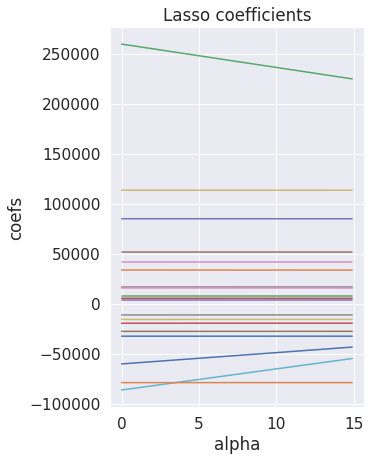

In [276]:
# Importing library for visualization
import matplotlib.pyplot as plt
coefsLasso = [] 

# Building Lasso for 200 values of alpha and write the coefficients into array
# 
alphasLasso = np.arange (0, a, 0.1) 

for i in np.arange(b):
  lasso = linear_model.Lasso(alpha=alphasLasso[i])
  lasso.fit(x_train, y_train)
  coefsLasso.append(lasso.coef_) 

# Building Lasso coefficient plots
# 
sns.set(font_scale=1.4)
plt.figure(figsize = (10,7))

plt.subplot(121)
plt.plot(alphasLasso, coefsLasso)
plt.title('Lasso coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')

plt.show()

# As we can see, Lasso influences less on the large coefficients, but the small ones Lasso reduces to zeroes. 
# Therefore Lasso can also be used to determine which features are important 
# to us and keeps the features that may influence the target variable

##### Elastic Net Regression

In [277]:

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [278]:
x = df.drop(['price'], axis=1)
y = df['price']

In [279]:
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,
                    param_grid={'alpha':np.logspace(-5,2,8),
                                'l1_ratio':[.2,.4,.6,.8]},
                    scoring='neg_mean_squared_error',
                    n_jobs=1,
                    refit=True,
                    cv=10)

In [280]:
search.fit(x,y)
par = search.best_params_
par

{'alpha': 1e-05, 'l1_ratio': 0.8}

In [281]:
alpha = par['alpha']
alpha

1e-05

In [282]:
l1_ratio = par['l1_ratio']
l1_ratio

0.8

In [283]:
abs(search.best_score_)

40974478314.37879

In [284]:
elastic=ElasticNet(normalize=True,
                   alpha=alpha,
                   l1_ratio=l1_ratio)
elastic.fit(x,y)
second_model=(mean_squared_error(y_true=y,y_pred=elastic.predict(x)))
print(second_model)

40528513934.63436


In [285]:
print(f'Elastic Net : {elastic.score(x, y)}')

Elastic Net : 0.6997162543856944


## Challenge

> In multiple linear regression we ended up drop some columns because their VIF score was around 5 while others were near 10.
>
> This still gave use bad score but with the other algorithm which had better score(this values are approximated):
>
>* Ridge Regression - 0.7004
>* Lasso Regression - 0.6986 (this did better than the other regressions)
>* Elastic Net Regression - 0.6997